## Import Libraries

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load Churn dataset

In [27]:
df = pd.read_csv('churn_data.csv', 
index_col = 'customerID')
df.head()

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,
7590-VHVEG,1,No,Month-to-month,Electronic check,29.85,29.85,No
5575-GNVDE,34,Yes,One year,Mailed check,56.95,1889.50,No
3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes
7795-CFOCW,45,No,One year,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,2,Yes,Month-to-month,Electronic check,70.70,151.65,Yes


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   PhoneService    7043 non-null   object 
 2   Contract        7043 non-null   object 
 3   PaymentMethod   7043 non-null   object 
 4   MonthlyCharges  7043 non-null   float64
 5   TotalCharges    7032 non-null   float64
 6   Churn           7043 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 440.2+ KB


## check for outliers

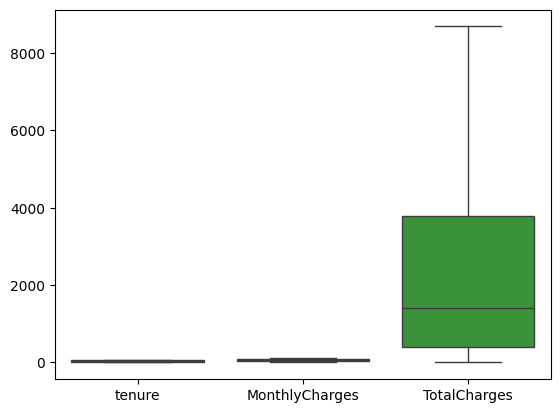

In [29]:

numeric_columns = df.select_dtypes(include=np.number).columns

sns.boxplot(data=df[numeric_columns])
plt.show()

## check for outiers and clip to upper and lower bounds

In [30]:

for column in df[numeric_columns]:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    upper_boundary = q3 + 1.5 * iqr
    lower_boundary = q1 - 1.5 * iqr
    outliers = df[(df[column] < lower_boundary) | (df[column] > upper_boundary)][column]
    if outliers.shape[0] > 0:
        print(outliers)
    else:
        print(f'no outliers for {column}')

no outliers for tenure
no outliers for MonthlyCharges
no outliers for TotalCharges


## MIssing values



In [31]:
print(df.isna().sum())

tenure             0
PhoneService       0
Contract           0
PaymentMethod      0
MonthlyCharges     0
TotalCharges      11
Churn              0
dtype: int64


## drop rows with missing values

In [32]:
df.dropna(inplace=True)
df.sample()

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,
8190-ZTQFB,41,No,One year,Electronic check,51.35,2075.1,No


## Convert categorical columns to numeric

In [33]:
df['PhoneService'] = df['PhoneService'].replace({'No': 0, 'Yes': 1})
df['Churn'].value_counts()


Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [34]:
df['Churn'] = df['Churn'].replace({'No': 0, 'Yes': 1})
df['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

## Get dummies and concatanate to the original df

In [35]:
PaymentMethod_dummies = pd.get_dummies(df['PaymentMethod'], prefix='PaymentMethod')
Contract_dummies = pd.get_dummies(df['Contract'], prefix='Contract')

df = pd.concat([df, PaymentMethod_dummies, Contract_dummies], axis=1)
df.head()


,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
customerID,,,,,,,,,,,,,,
7590-VHVEG,1,0,Month-to-month,Electronic check,29.85,29.85,0,False,False,True,False,True,False,False
5575-GNVDE,34,1,One year,Mailed check,56.95,1889.50,0,False,False,False,True,False,True,False
3668-QPYBK,2,1,Month-to-month,Mailed check,53.85,108.15,1,False,False,False,True,True,False,False
7795-CFOCW,45,0,One year,Bank transfer (automatic),42.30,1840.75,0,True,False,False,False,False,True,False
9237-HQITU,2,1,Month-to-month,Electronic check,70.70,151.65,1,False,False,True,False,True,False,False


In [36]:
dummies = ['Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'PaymentMethod_Credit card (automatic)']

for column in dummies:
    df[column] = pd.factorize(df[column])[0]

df.sample(5)

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
customerID,,,,,,,,,,,,,,
9448-REEVD,1,1,Month-to-month,Credit card (automatic),44.70,44.70,1,0,1,1,0,0,0,0
1850-AKQEP,8,1,Month-to-month,Mailed check,20.35,178.70,0,0,0,1,1,0,0,0
0096-BXERS,6,1,Month-to-month,Electronic check,50.35,314.55,0,0,0,0,0,0,0,0
7760-OYPDY,2,1,Month-to-month,Electronic check,80.65,144.15,1,0,0,0,0,0,0,0
6339-DKLMK,13,0,Month-to-month,Electronic check,31.65,389.95,0,0,0,0,0,0,0,0


## Drop original categorical columns

In [37]:
df = df.drop(['PaymentMethod', 'Contract'], axis=1)
df

,tenure,PhoneService,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
customerID,,,,,,,,,,,,
7590-VHVEG,1,0,29.85,29.85,0,0,0,0,0,0,0,0
5575-GNVDE,34,1,56.95,1889.50,0,0,0,1,1,1,1,0
3668-QPYBK,2,1,53.85,108.15,1,0,0,1,1,0,0,0
7795-CFOCW,45,0,42.30,1840.75,0,1,0,1,0,1,1,0
9237-HQITU,2,1,70.70,151.65,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,24,1,84.80,1990.50,0,0,0,1,1,1,1,0
2234-XADUH,72,1,103.20,7362.90,0,0,1,1,0,1,1,0
4801-JZAZL,11,0,29.60,346.45,0,0,0,0,0,0,0,0


## Feature Engineering

## Ratio of TotalCharges of MonthlyCharges

In [38]:
df[df['MonthlyCharges'] == 0]

,tenure,PhoneService,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
customerID,,,,,,,,,,,,


In [39]:
df['TotalCharges_MonthlyCharges_Ratio'] = df['TotalCharges'] / df['MonthlyCharges']

## Histogram

<Axes: xlabel='TotalCharges_MonthlyCharges_Ratio', ylabel='Count'>

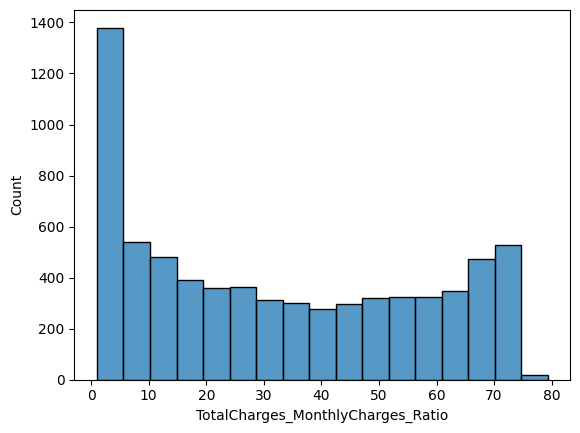

In [40]:
sns.histplot(data=df, x='TotalCharges_MonthlyCharges_Ratio')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7032 non-null   int64  
 1   PhoneService                             7032 non-null   int64  
 2   MonthlyCharges                           7032 non-null   float64
 3   TotalCharges                             7032 non-null   float64
 4   Churn                                    7032 non-null   int64  
 5   PaymentMethod_Bank transfer (automatic)  7032 non-null   int64  
 6   PaymentMethod_Credit card (automatic)    7032 non-null   int64  
 7   PaymentMethod_Electronic check           7032 non-null   int64  
 8   PaymentMethod_Mailed check               7032 non-null   int64  
 9   Contract_Month-to-month                  7032 non-null   int64  
 10  Contract_One year                     

In [42]:
df.to_csv('prepared_churn_data.csv')

We begin by importing necessary libraries and then loading the churn dataset into a pandas DataFrame, setting the `customerID` column as the index. Basic information about the DataFrame, such as data types and null values, is displayed. Numeric columns are identified and used to create a boxplot to visualize the distribution of numerical data and identify potential outliers. 

Outliers are detected for each numeric column using the interquartile range (IQR) method and printed if found. Null values are counted, and rows containing null values are dropped from the DataFrame. Categorical columns ('PhoneService' and 'Churn') are converted into binary numeric representations. Dummy variables are created for categorical columns ('PaymentMethod' and 'Contract').

Specific dummy variables are converted to factorized numeric values. The original categorical columns are dropped, and a new column representing the ratio of TotalCharges to MonthlyCharges is created. A histogram is plotted to visualize the distribution of the ratio. Finally, the prepared DataFrame is saved to a new CSV file named prepared_churn_data.csv.